<font color=Green size=4>Business Question Solving </font>

<font size=2> This notebook is using to answer the business question about the customer data table. </font>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling

aisle_path = 'E:\Sebnewrepo\Data/aisles.csv'
aisles = pd.read_csv(aisle_path)

departments_path = 'E:\Sebnewrepo\Data/departments.csv'
departments = pd.read_csv(departments_path)

order_products_path = 'E:\Sebnewrepo\Data/order_products.csv'
order_products = pd.read_csv(order_products_path)

orders_path = 'E:\Sebnewrepo\Data/orders.csv'
orders = pd.read_csv(orders_path)

products_path = 'E:\Sebnewrepo\Data/products.csv'
products = pd.read_csv(products_path)

<font size=3 color=green style="font-family:geneva">
Ticket 01 (Week 1)
    </font>

Q1. How many products people usually order?

In [30]:
groupby01 = order_products['add_to_cart_order'].groupby(order_products['order_id'])
amount01 = pd.DataFrame({ 'Amount': groupby01.max()})

groupby02 = amount01['Amount'].groupby(amount01['Amount'])
groupby02.count().sort_values(ascending = False).head(10)


Amount
5     237225
6     236383
4     230299
7     228547
3     215060
8     211357
2     194361
9     191564
10    172103
1     163593
Name: Amount, dtype: int64

Q2. Which products are ordered the most?

In [35]:
jointable01 = order_products.merge(products, on='product_id', how="left")
groupby03 = jointable01['product_name'].groupby(jointable01['product_name'])

groupby03.count().sort_values(ascending = False).head(10)



product_name
Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

Q3. Which product is most likely to be added first in cart?

In [43]:
filtertable01 = jointable01[jointable01.add_to_cart_order == 1]
groupby04 = filtertable01['product_name'].groupby(filtertable01['product_name'])
groupby04.count().sort_values(ascending = False).head(10)


product_name
Banana                    115521
Bag of Organic Bananas     82877
Organic Whole Milk         32071
Organic Strawberries       28875
Organic Hass Avocado       24913
Organic Baby Spinach       24412
Organic Avocado            23393
Spring Water               17552
Strawberries               17073
Organic Raspberries        14950
Name: product_name, dtype: int64

Q4. What is the time at which people usually order products?

In [45]:
groupby05 = orders['order_hour_of_day'].groupby(orders['order_hour_of_day'])
groupby05.count().sort_values(ascending = False).head(5)

order_hour_of_day
10    288418
11    284728
15    283639
14    283042
13    277999
Name: order_hour_of_day, dtype: int64

<font size=3 color=green style="font-family:geneva">
Ticket 02: Business Question Part2 (Week 2)
    </font>

Q1: Plot the distribution of the number of orders made by each costumer in the whole dataset.

In [10]:
groupby06 = orders['order_id'].groupby(orders['user_id'])
result01 = pd.DataFrame({'Number_of_Order':groupby06.count()})

groupby07 = result01['Number_of_Order'].groupby(result01['Number_of_Order'])
result02 = groupby07.count()
result02

Number_of_Order
4      23986
5      19590
6      16165
7      13850
8      11700
       ...  
96        67
97        54
98        50
99        47
100     1374
Name: Number_of_Order, Length: 97, dtype: int64

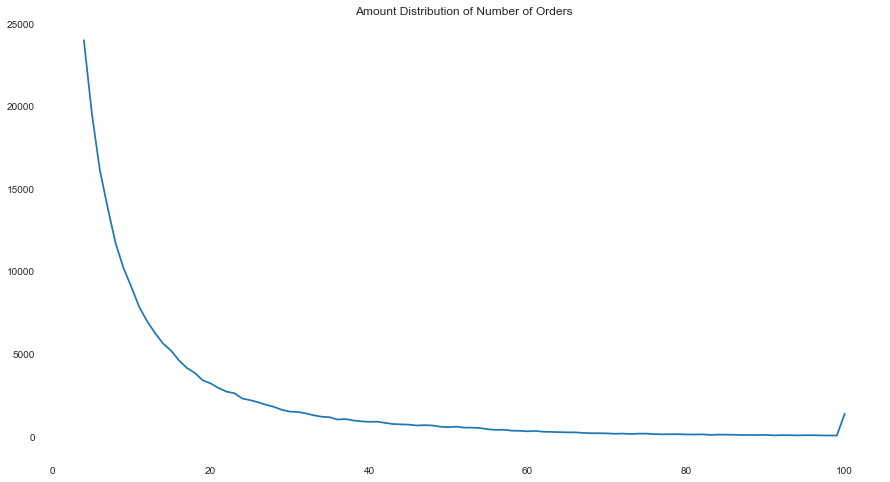

In [13]:
plt.figure(figsize=(15,8))
plt.title('Amount Distribution of Number of Orders')
plt.plot(result02)
plt.show()

Q2. What are customers' favorite departments and Aisles

In [28]:
#Join the table first
jointable01 = order_products.merge(products, on='product_id', how="left")
join_department = jointable01.merge(departments, on='department_id', how="left")
join_a_d = join_department.merge(aisles, on='aisle_id', how="left")


In [29]:
# Favorite Department
result03 = join_a_d['department'].groupby(join_a_d['department'])
result03.count().sort_values(ascending = False).head(10)

department
produce            9888378
dairy eggs         5631067
snacks             3006412
beverages          2804175
frozen             2336858
pantry             1956819
bakery             1225181
canned goods       1114857
deli               1095540
dry goods pasta     905340
Name: department, dtype: int64

In [30]:
# Favorite Aisle
result04 = join_a_d['aisle'].groupby(join_a_d['aisle'])
result04.count().sort_values(ascending = False).head(10)

aisle
fresh fruits                     3792661
fresh vegetables                 3568630
packaged vegetables fruits       1843806
yogurt                           1507583
packaged cheese                  1021462
milk                              923659
water seltzer sparkling water     878150
chips pretzels                    753739
soy lactosefree                   664493
bread                             608469
Name: aisle, dtype: int64

Q3. What is the best selling Aisles in each department based on number of orders

In [46]:
result04 = join_a_d[['department','aisle']].groupby([join_a_d['department'],join_a_d['aisle']])
result05 = result04.count()
result05 = pd.DataFrame({'Number_of_Orders':result05['department']})
result05

Number_of_Orders
department aisle                                       
alcohol    beers coolers                          50496
           red wines                              36424
           specialty wines champagnes             11659
           spirits                                29069
           white wines                            31646
...                                                 ...
snacks     ice cream toppings                     11706
           mint gum                               23626
           nuts seeds dried fruit                319019
           popcorn jerky                         170441
           trail mix snack mix                    37053

[134 rows x 1 columns]

In [47]:
#index to column
result06 = result05.reset_index()


,department,aisle,Number_of_Orders
0,alcohol,beers coolers,50496
1,alcohol,red wines,36424
2,alcohol,specialty wines champagnes,11659
3,alcohol,spirits,29069
4,alcohol,white wines,31646
...,...,...,...
129,snacks,ice cream toppings,11706
130,snacks,mint gum,23626
131,snacks,nuts seeds dried fruit,319019
132,snacks,popcorn jerky,170441


In [51]:
# best selling Aisles in each department
result06.sort_values('Number_of_Orders', ascending = False).groupby('department').head(1)

,department,aisle,Number_of_Orders
118,produce,fresh fruits,3792661
42,dairy eggs,yogurt,1507583
21,beverages,water seltzer sparkling water,878150
124,snacks,chips pretzels,753739
10,bakery,bread,608469
61,frozen,frozen produce,545107
44,deli,lunch meat,412087
7,babies,baby food formula,395654
23,breakfast,cereal,393787
32,canned goods,soup broth bouillon,361573


Q4. Draw a pie chart for the number of orders in each departments

In [64]:
result04 = join_a_d['order_id'].groupby(join_a_d['department'])
result09 = result04.nunique()
result09 = result09.reset_index()
result09.columns = ['department','Number_of_Order']
result09

,department,Number_of_Order
0,alcohol,87794
1,babies,184074
2,bakery,917980
3,beverages,1518833
4,breakfast,547067
5,bulk,35125
6,canned goods,710721
7,dairy eggs,2264738
8,deli,802581
9,dry goods pasta,623738


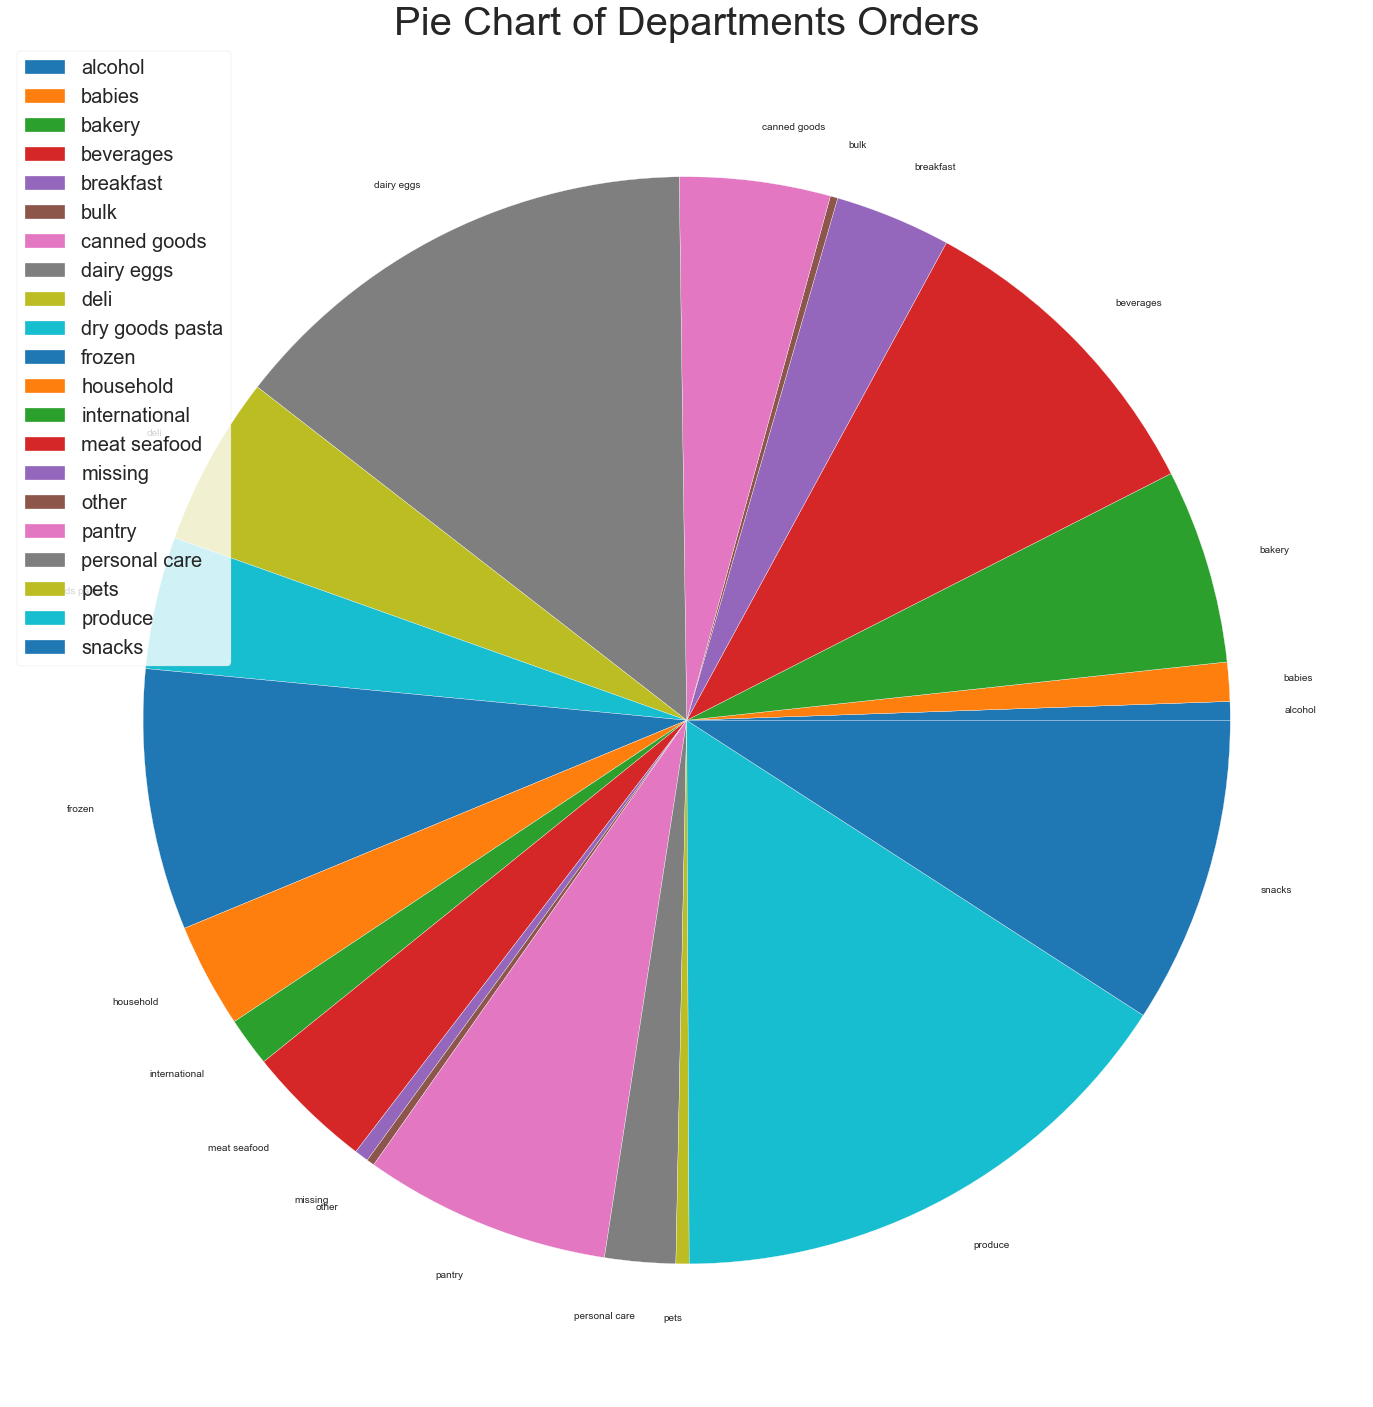

In [78]:
# pie chart

plt.figure(figsize=(25,25))
plt.title('Pie Chart of Departments Orders', fontsize=40)
plt.pie(result09['Number_of_Order'], labels = result09['department'])
plt.legend(loc=2,prop={'size':20})
plt.show()